In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#SKLEARN LIBRARIES
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve

#Graficador
import seaborn as sns

#Crea las neuronas (Dense) y el sequential crea los cortes del cerebro.
from keras.models import Sequential
from keras.layers import Dense

#Tensor floW es para modelos de redes neuronales.
import tensorflow as tf

from google.colab import drive
drive.mount("/content/drive")
nxl="/content/drive/MyDrive/Final Analitica/CUSTOMER_SEG.xlsx"

Mounted at /content/drive


# 1. KNN MODEL

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


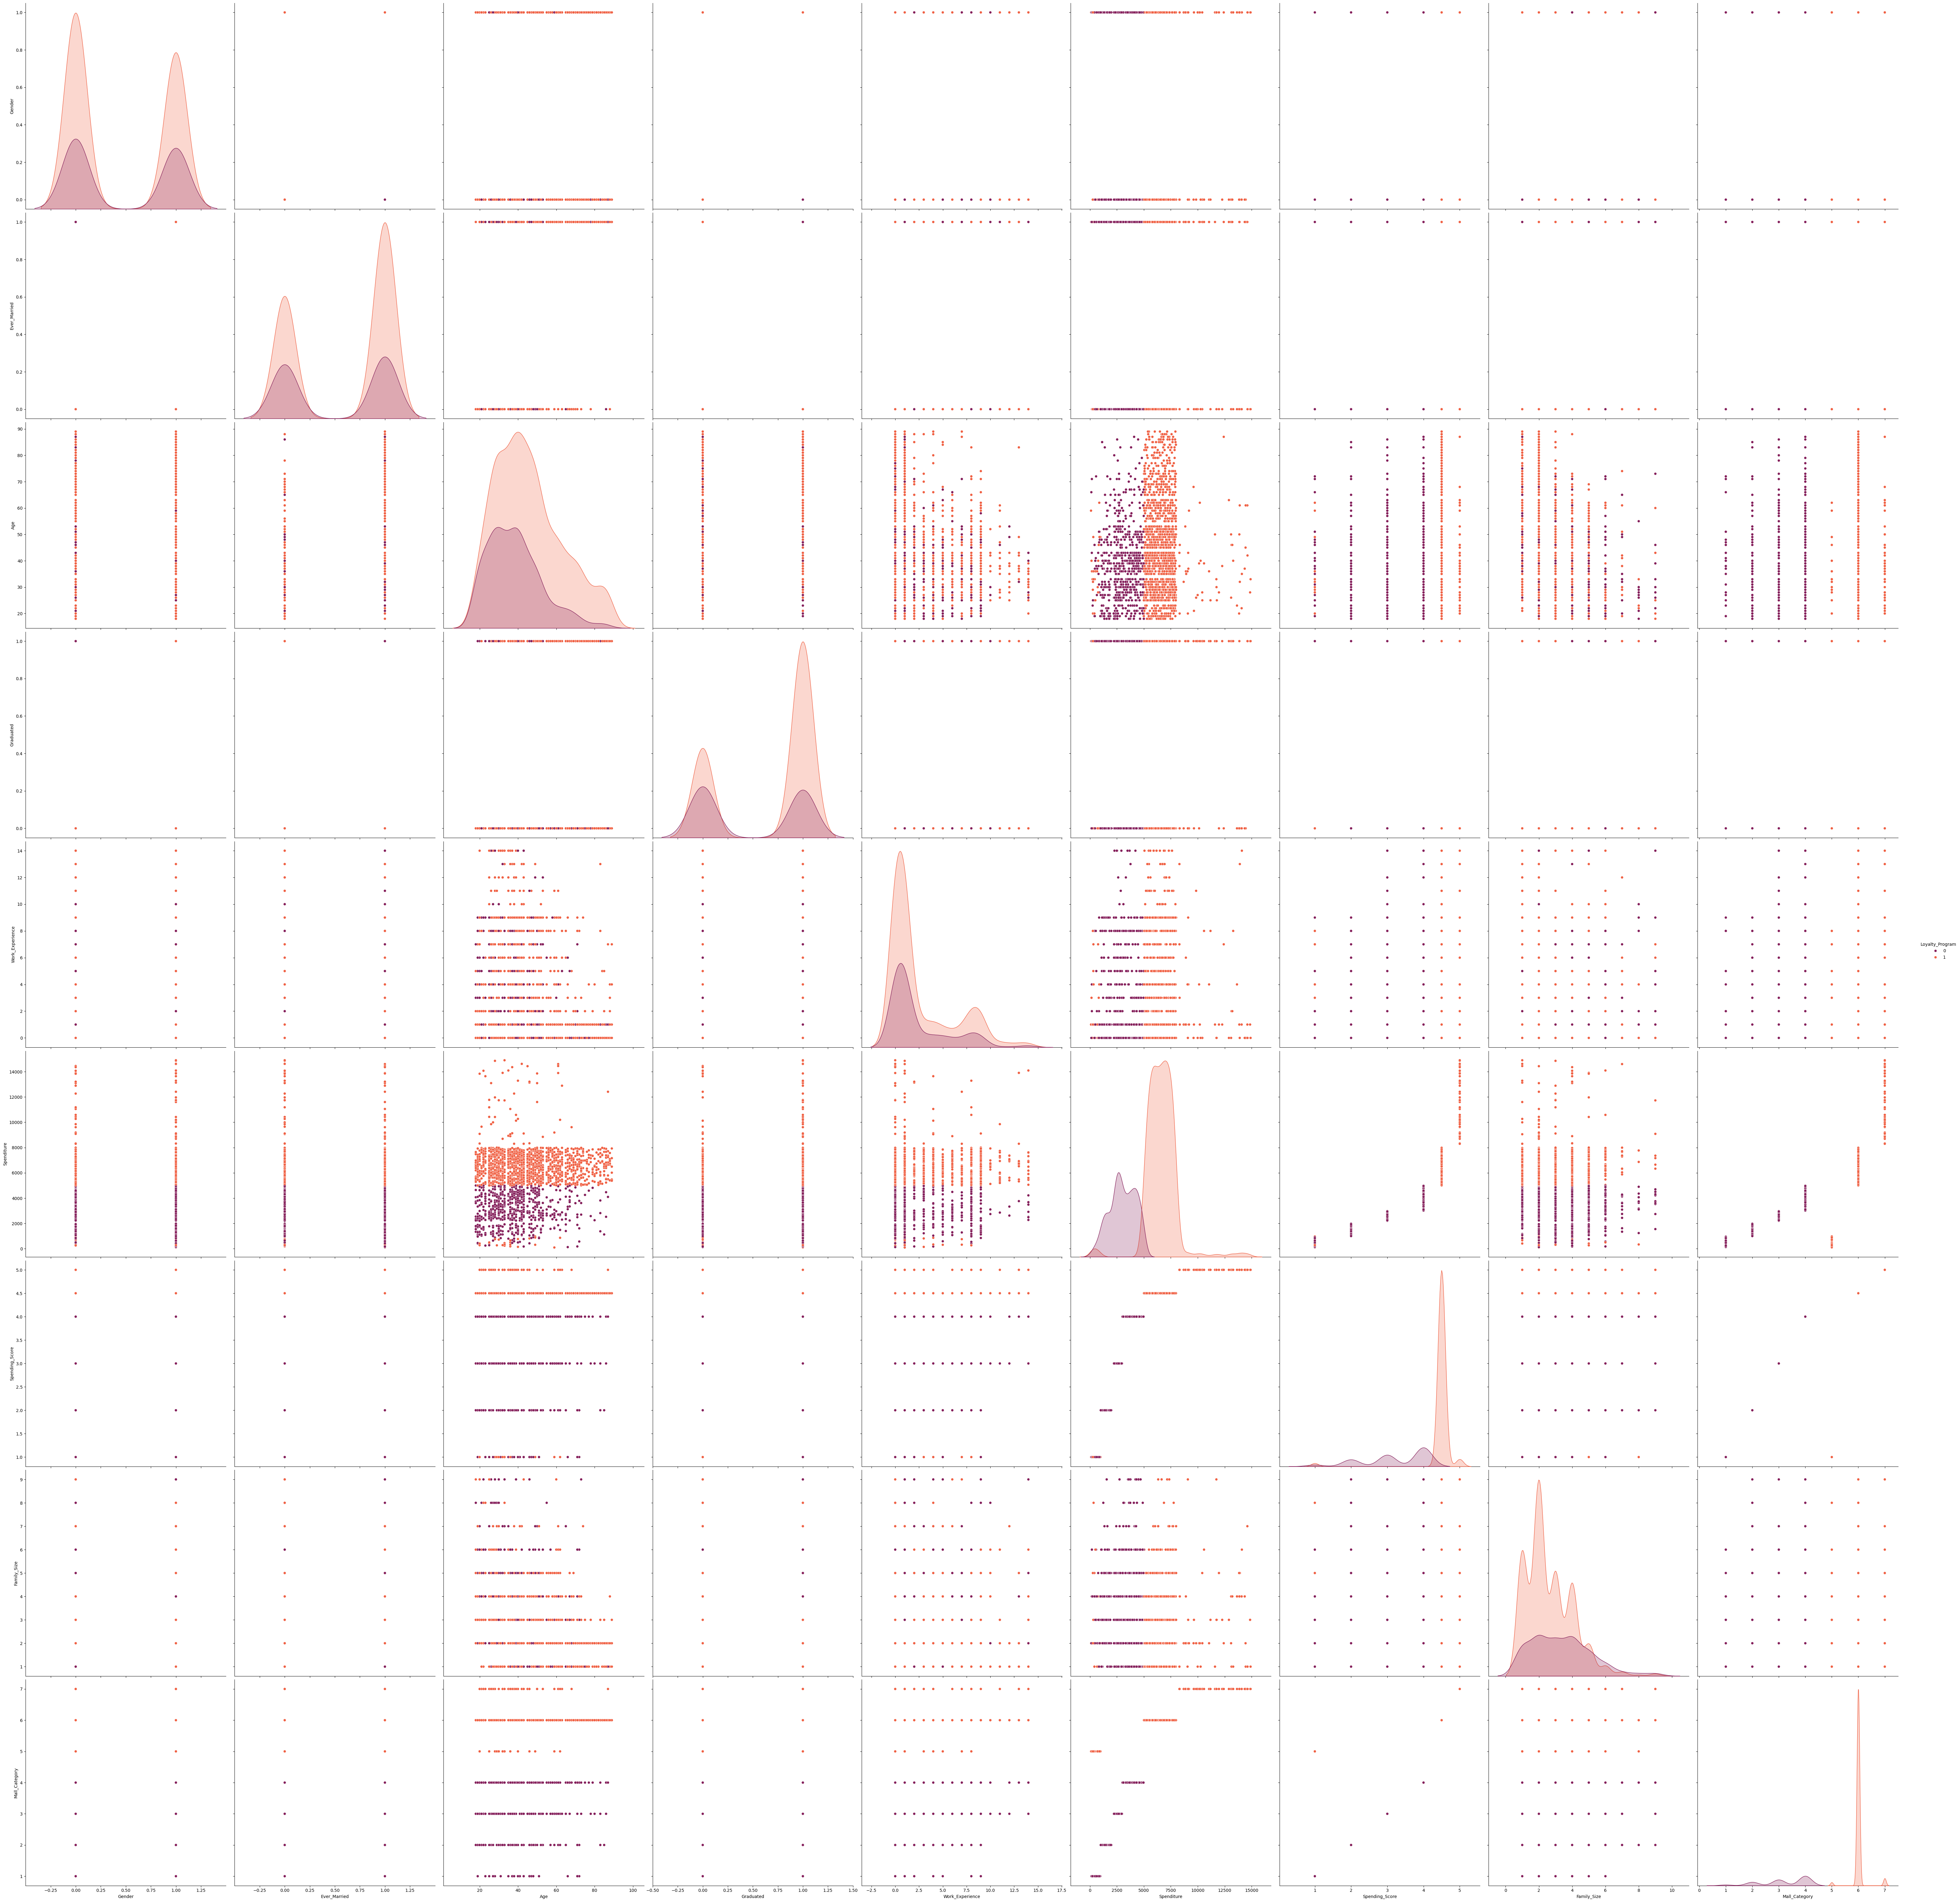

In [ ]:
XDB=pd.read_excel(nxl,sheet_name=0)
XDB=XDB.dropna()

#Se procede con la seleccion de las variables de entrada y la deseada (Yd).

XDM=(XDB[["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience","Spenditure","Spending_Score", "Family_Size","Mall_Category", "Loyalty_Program"]])
XDM.corr()

XD=np.array(XDB[["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience","Spenditure","Spending_Score", "Family_Size","Mall_Category"]])
yd=np.array(XDB[["Loyalty_Program"]])

sns.pairplot(XDB, hue="Loyalty_Program",  palette="rocket", size=7, vars=["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience","Spenditure","Spending_Score", "Family_Size","Mall_Category"])



In [ ]:
mknn=KNeighborsClassifier()
mknn.fit(XD,yd)
ydp=mknn.predict(XD)

print("La precisión en el pronóstico de lealtad de un cliente es: ", metrics.accuracy_score(yd,ydp))

La precisión en el pronóstico de lealtad de un cliente es:  0.9907149489322191


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
cm=confusion_matrix(yd,ydp)
df=pd.DataFrame(cm)
df
df.to_excel("MatrizConfusión.xlsx")


In [ ]:
VP=cm[0,0]; FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]

S= (VP)/(VP+FP)
print("La sensibilidad es:", S)

ES=(VN)/(FN+VN)
print("La especificidad es:", ES)

La sensibilidad es: 0.9804216867469879
La especificidad es: 0.9953020134228188


In [ ]:
xdi=np.array([(0,1,45,1,7,4000,4.5, 4.0,4)])
ydi=mknn.predict(xdi)
print("El cliente con las anteriores variables socioeconómicas pertenece o no al loyalty program: ", ydi )

El cliente con las anteriores variables socioeconómicas pertenece o no al loyalty program:  [0]


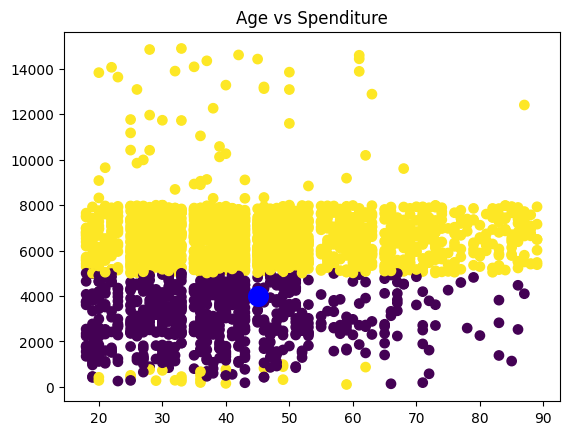

In [ ]:
plt.scatter(XD[:,2],XD[:,5],c=yd,s=45,cmap='viridis')
plt.scatter(xdi[:,2],xdi[:,5],marker='o',s=200,facecolors='blue')
plt.title('Age vs Spenditure')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[4.65517241e-01 5.26645768e-01 3.81253918e+01 4.85893417e-01
  2.46551724e+00 2.79827116e+03 3.09561129e+00 3.33542320e+00
  3.23981191e+00]
 [4.43931398e-01 6.17414248e-01 4.57071240e+01 6.82717678e-01
  2.58773087e+00 6.65419459e+03 4.50296834e+00 2.62730871e+00
  5.97757256e+00]]


KeyError: "Column(s) ['Enroll'] do not exist"

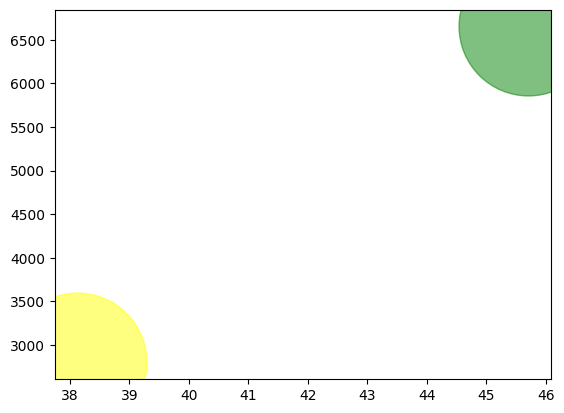

In [ ]:
k=2

mkm=KMeans(n_clusters=k,init='random', random_state=42)
mkm.fit(XD,yd)
labels=mkm.labels_
centroids=mkm.cluster_centers_
print(centroids)

plt.scatter(centroids[0,2], centroids[0,5],marker='o',alpha=0.5, s=10000, facecolor='yellow')
plt.scatter(centroids[1,2], centroids[1,5],marker='o',alpha=0.5, s=10000, facecolor='green')

#Cuantos datos conforman cada grupo o cluster
counts_1=np.bincount(labels)
XDB['cluster']=labels

counts_2=XDB.groupby('cluster').agg({"Enroll":lambda x: (x==0).sum()})
counts_3=XDB.groupby('cluster').agg({"Enroll":lambda x: (x==1).sum()})

df=pd.DataFrame(np.column_stack((counts_2,counts_3)))
df

## **2. Modelo Naive Bayes:**

In [ ]:
XD_NB=np.array(XDB[["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience","Spenditure", "Family_Size"]])
yd_NB=np.array(XDB[["Mall_Category"]])

In [ ]:
mnb=GaussianNB()
mnb.fit(XD_NB,yd_NB)

Persona_A=np.array([[0,1,45,1,7,4000,3]])

VP=mnb.predict(Persona_A)
print("La persona con los valores socioeconómicos anteriores pertenece a la categoría del mall: ",VP)

u=mnb.theta_
print("La matriz de las medias de cada variable es:", u)

sigma=np.sqrt(mnb.var_)
print("La matriz de las desviaciones de cada variable es:", sigma)

La persona con los valores socioeconómicos anteriores pertenece a la categoría del mall:  [4.]
La matriz de las medias de cada variable es: [[5.18518519e-01 7.40740741e-01 4.00370370e+01 5.55555556e-01
  2.18518519e+00 5.84370370e+02 3.03703704e+00]
 [4.56896552e-01 4.13793103e-01 3.62413793e+01 5.43103448e-01
  2.68965517e+00 1.49419828e+03 3.58620690e+00]
 [4.41025641e-01 5.07692308e-01 3.84769231e+01 5.28205128e-01
  2.68717949e+00 2.59015385e+03 2.94358974e+00]
 [4.78125000e-01 5.75000000e-01 3.89156250e+01 4.28125000e-01
  2.14062500e+00 4.03170625e+03 3.55937500e+00]
 [6.95652174e-01 4.34782609e-01 3.67826087e+01 5.21739130e-01
  2.47826087e+00 4.88608696e+02 2.82608696e+00]
 [4.35608726e-01 6.23504574e-01 4.60823364e+01 6.89655172e-01
  2.61294863e+00 6.52943139e+03 2.58620690e+00]
 [5.57692308e-01 4.80769231e-01 3.93461538e+01 6.73076923e-01
  2.80769231e+00 1.15224038e+04 3.07692308e+00]]
La matriz de las desviaciones de cada variable es: [[5.04385451e-01 4.43611896e-01 1.4127

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
ymb=mnb.predict(XD_NB)
print(ymb)
confusion_matrix(yd_NB,ymb)

VP=cm[0,0];FN=cm[0,1]
FP=cm[1,0];VN=cm[1,1]

print("La exactitud es:", (VP+VN)/(VP+FN+FP+VN))
print("El coeficiente de especificidad", VN/(FP+VN))

[6. 6. 6. ... 6. 4. 7.]
La exactitud es: 0.9907149489322191
El coeficiente de especificidad 0.9913101604278075


In [ ]:
ndc=mnb.class_count_
print("Los siguientes valores indican la cantidad de personas en cada categoría del rating del mall: ", ndc)

Los siguientes valores indican la cantidad de personas en cada categoría del rating del mall:  [  27.  116.  195.  320.   23. 1421.   52.]


## 3. Modelo Neuronal Madeline

In [ ]:
XD_MD=np.array(XDB[["Gender", "Ever_Married", "Age", "Graduated", "Work_Experience", "Family_Size","Mall_Category"]])
yd_MD=np.array(XDB[["Spenditure"]])


In [ ]:
XDn=XD_MD/np.max(XD_MD, axis=0) #AXIS 0 BUSCA EL MAXIMO POR COLUMNAS
YDn=(yd_MD-np.mean(yd_MD))/np.std(yd_MD); YDn=1/(1+np.exp(-YDn)) #Normalizada

YDn #Check Normalizacion
XDn #Check Normalizacion


array([[1.        , 1.        , 0.40449438, ..., 0.        , 0.11111111,
        0.85714286],
       [0.        , 1.        , 0.41573034, ..., 0.57142857, 0.44444444,
        0.85714286],
       [0.        , 1.        , 0.66292135, ..., 0.78571429, 0.22222222,
        0.85714286],
       ...,
       [1.        , 0.        , 0.39325843, ..., 0.07142857, 0.11111111,
        0.85714286],
       [0.        , 1.        , 0.52808989, ..., 0.07142857, 0.55555556,
        0.57142857],
       [1.        , 0.        , 0.48314607, ..., 0.64285714, 0.33333333,
        1.        ]])

68/68 [==============================] - 1s 3ms/step - loss: 0.0455
Epoch 1/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0410
Epoch 2/250
4/4 [==============================] - 0s 7ms/step - loss: 0.0407
Epoch 3/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0403
Epoch 4/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0400
Epoch 5/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0396
Epoch 6/250
4/4 [==============================] - 0s 6ms/step - loss: 0.0393
Epoch 7/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0390
Epoch 8/250
4/4 [==============================] - 0s 4ms/step - loss: 0.0386
Epoch 9/250
4/4 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 10/250
4/4 [==============================] - 0s 5ms/step - loss: 0.0380
Epoch 11/250
4/4 [==============================] - 0s 4ms/step - loss: 0.0377
Epoch 12/250
4/4 [==============================] - 0s 6ms/step - loss: 

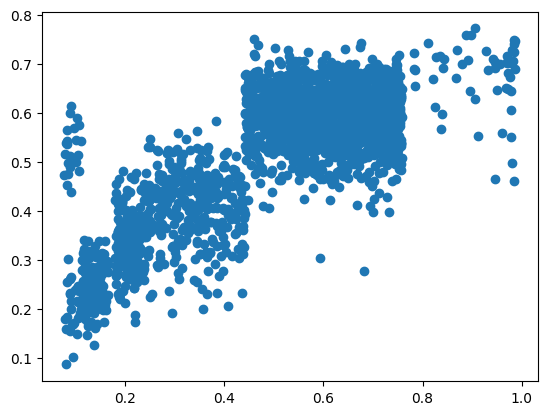

La correlación es:           0         1
0  1.000000  0.785216
1  0.785216  1.000000
Los efectos independientes son:╲n [[-0.15819052]
 [ 0.0439449 ]
 [-1.052133  ]
 [-0.1055557 ]
 [-0.4056882 ]
 [-1.3734801 ]
 [ 2.5763054 ]]


<Figure size 640x480 with 0 Axes>

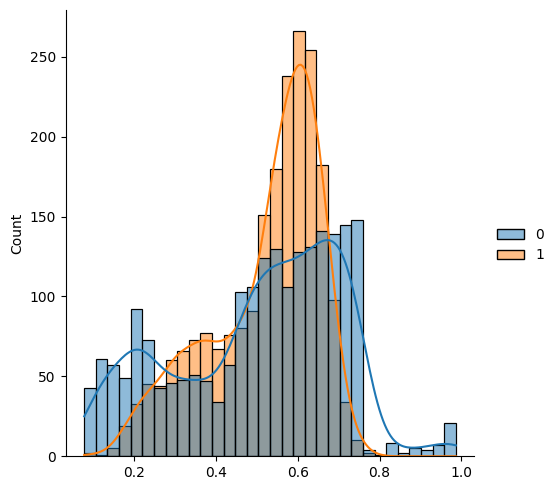

La discrepancia entre medias es: -3.43204701738882
La discrepancia entre las dispersiones es: 33.61767163114217


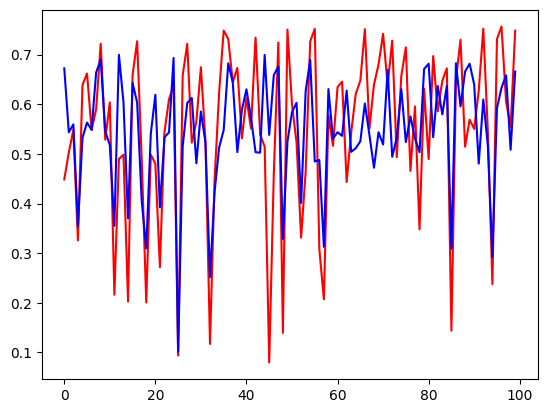

In [ ]:
NE=7
model=Sequential()
model.add(Dense(10,activation='linear',use_bias=False,input_dim=NE))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='mse')
model.fit(XDn,YDn)
history=model.fit(XDn,YDn,epochs=250,batch_size=614)
ys=model.predict(XDn)

#Gráfica de Dispersión (entre más diagonal y recta este, mayor correlación tienen los datos)
plt.figure()
plt.scatter(YDn,ys)
plt.show()

#Matriz de correlación
df=pd.DataFrame(np.column_stack((YDn,ys)))
df.corr()
print("La correlación es:", df.corr())


#Efectos independientes
W2=model.layers[0].get_weights()[0]
C2=model.layers[1].get_weights()[0]
np.dot(W2,C2)
print("Los efectos independientes son:╲n",np.dot(W2,C2))


#Como son las distribuciones de los datos
plt.figure()
sns.displot((YDn.flatten(),ys.flatten()),kde=True)
plt.show()
#En este caso, las variables mas importantes son los ingresos y el monto.

#Discrepancias entre las medias
dscm2=(np.mean(YDn)-np.mean(ys))/np.mean(YDn)
print("La discrepancia entre medias es:", dscm2*100)

#Si la discrepancia es negativa significa que el modelo esta sobreestimando los datos.

#Discrepancia entre desviaciones
dscv2=(np.std(YDn)-np.std(ys))/np.std(YDn)
print("La discrepancia entre las dispersiones es:", dscv2*100)

#La gráfica de los datos de referencia es:
plt.figure()
plt.plot(YDn[0:100,],'r',ys[0:100,],'b')
plt.show()

In [ ]:
persona_B=np.array([[0,1,48,1,10,5,6]])
XD4=persona_B/np.max(XD_MD,axis=0)
ys2=model.predict(XD4)
print("El cliente con las variables socioeconómicas anteriores tiene un gasto promedio en el mall de: ", ys2*14683)


1/1 [==============================] - 0s 77ms/step
El cliente con las variables socioeconómicas anteriores tiene un gasto promedio en el mall de:  [[8542.429]]
